# 지수별 클러스터링

'세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'

`'세대당공원면적'-'시민문화지수'`

생성한 각 지수를 군집화해 최적의 행정동을 추출

## #01. 패키지

In [4]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings("ignore")

import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame

# 군집을 위한 패키지
from sklearn.cluster import KMeans

In [5]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터

In [6]:
origin = read_excel("행정동병합테스트22_최종데이터.xlsx")
origin.head()

,시도명,시군구코드,시군구명,행정동코드,행정동코드수정,읍면동명,생성일자,말소일자,지하철역수,의료기관수,...,주차장개소,주차장면수,하천및한강여부,아동인구,노인인구,장애인인구,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,NaN,NaN,11.0,...,668,4592,무,612.0,2154,437,337.55,0.883757,12.240301,0.978054
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,NaN,2.0,75.0,...,362,12605,무,488.0,1808,267,60.79,0.952852,35.399526,2.354708
2,서울특별시,11110,종로구,1111054000,11110540,삼청동,19880423,NaN,NaN,11.0,...,343,2237,무,108.0,626,110,956.51,0.715943,39.839834,2.266277
3,서울특별시,11110,종로구,1111055000,11110550,부암동,19880423,NaN,NaN,4.0,...,596,3533,유,385.0,1814,311,0.00,0.710363,5.777047,1.081284
4,서울특별시,11110,종로구,1111056000,11110560,평창동,19880423,NaN,NaN,15.0,...,1617,9390,유,1033.0,3495,491,1.14,0.714284,2.630924,1.576024


## #03. 데이터 살펴보기

In [7]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '행정동코드수정', '읍면동명', '생성일자', '말소일자',
       '지하철역수', '의료기관수', '사회복지시설수', '계(명)', '면적', '구성비', '행정동별공원수', '공공체육시설수',
       '문화시설수', '학교수', '사업체수', '보육시설', '주차장개소', '주차장면수', '하천및한강여부', '아동인구',
       '노인인구', '장애인인구', '세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'],
      dtype='object')

In [8]:
tmp = origin.filter(['읍면동명', '세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'])
tmp.head()

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,청운효자동,337.55,0.883757,12.240301,0.978054
1,사직동,60.79,0.952852,35.399526,2.354708
2,삼청동,956.51,0.715943,39.839834,2.266277
3,부암동,0.00,0.710363,5.777047,1.081284
4,평창동,1.14,0.714284,2.630924,1.576024


In [9]:
tmp.isnull().sum()

읍면동명       0
세대당공원면적    3
교통약자지수     0
시민문화지수     0
접근성지수      0
dtype: int64

In [10]:
tmp = tmp.fillna(0)
tmp.isnull().sum()

읍면동명       0
세대당공원면적    0
교통약자지수     0
시민문화지수     0
접근성지수      0
dtype: int64

### 산점도 그래프

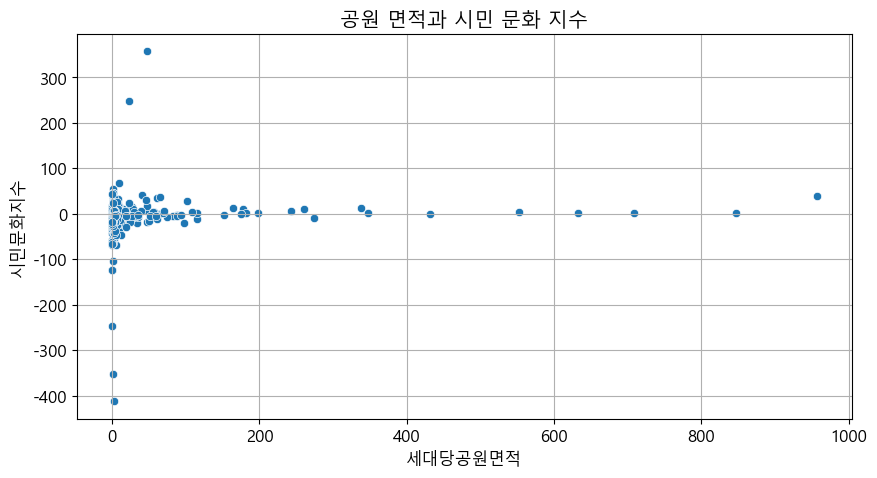

In [11]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='세대당공원면적', y = '시민문화지수')
plt.title("공원 면적과 시민 문화 지수")
plt.xlabel("세대당공원면적")
plt.ylabel("시민문화지수")

plt.grid()
plt.show()
plt.close()

## #04. 군집화 모델

### 모델 구현

In [12]:
# X = origin[['사업체_수', '행정동내_지하철역_수']].values
# X = origin.iloc[:, [origin.columns.get_loc('사업체_수'), origin.columns.get_loc('행정동내_지하철역_수')]].values

X = tmp.iloc[:,[1,2]].values
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수

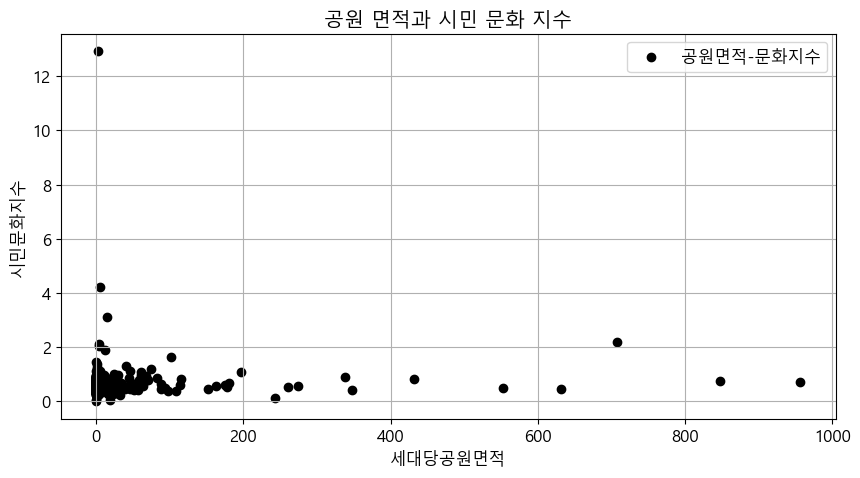

In [13]:
plt.scatter(X[:,0], X[:,1], c='black', label='공원면적-문화지수')
plt.xlabel('세대당공원면적')
plt.ylabel('시민문화지수')
plt.legend()
plt.title('공원 면적과 시민 문화 지수')
plt.grid()
plt.show()
plt.close()

### k값 결정

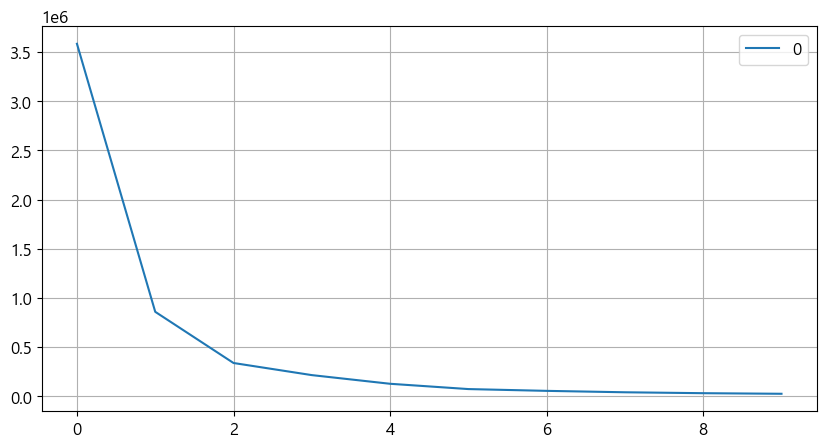

In [14]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

DataFrame(inertia).plot()
plt.grid()

> 4이후로 감소폭이 크지 않으므로 k=4로 결정

## #05. K-means clustering

In [15]:
kmeans = KMeans(n_clusters=4).fit(X) #군집 n개로 나누겠다
tmp['클러스터_수치'] = kmeans.labels_
tmp

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
0,청운효자동,337.55,0.883757,12.240301,0.978054,3
1,사직동,60.79,0.952852,35.399526,2.354708,2
2,삼청동,956.51,0.715943,39.839834,2.266277,1
3,부암동,0.00,0.710363,5.777047,1.081284,0
4,평창동,1.14,0.714284,2.630924,1.576024,0
...,...,...,...,...,...,...
421,성내제2동,0.18,0.487564,-19.819594,1.947349,0
422,성내제3동,0.35,0.719540,-21.968657,1.275197,0
423,길동,4.11,0.548756,-5.462606,0.837081,0
424,둔촌제1동,0.00,0.000000,-17.926507,0.000000,0


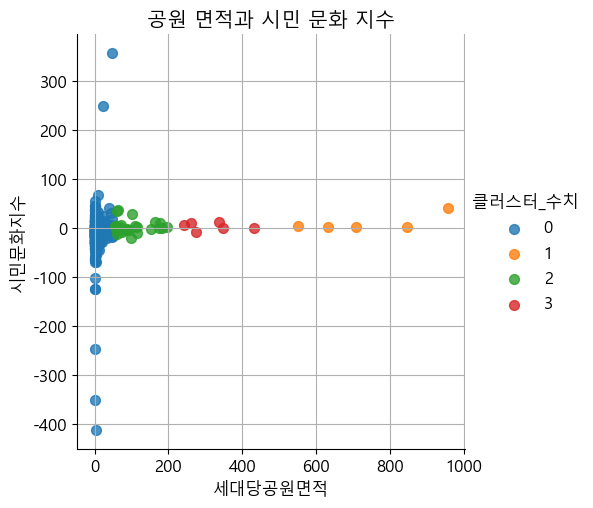

In [16]:
sb.lmplot(x='세대당공원면적', y='시민문화지수', data=tmp, 
          fit_reg=False, scatter_kws={"s": 50}, hue="클러스터_수치")
plt.title("공원 면적과 시민 문화 지수")
plt.grid()

In [17]:
tmp[tmp['클러스터_수치']==0]

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
3,부암동,0.00,0.710363,5.777047,1.081284,0
4,평창동,1.14,0.714284,2.630924,1.576024,0
5,무악동,2.16,0.392369,-2.638884,0.131079,0
6,교남동,2.33,0.510352,-62.819973,0.351403,0
7,가회동,4.84,2.121205,-4.591239,1.973688,0
...,...,...,...,...,...,...
420,성내제1동,1.56,0.651309,-26.750660,1.084395,0
421,성내제2동,0.18,0.487564,-19.819594,1.947349,0
422,성내제3동,0.35,0.719540,-21.968657,1.275197,0
423,길동,4.11,0.548756,-5.462606,0.837081,0


In [18]:
tmp[tmp['클러스터_수치']==1]

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
2,삼청동,956.51,0.715943,39.839834,2.266277,1
95,면목제4동,552.28,0.489069,3.317796,0.956309,1
148,도봉제1동,847.11,0.729134,1.451742,1.138394,1
166,중계제4동,632.00,0.452277,2.248717,0.130324,1
357,내곡동,708.16,2.190136,2.145861,0.513453,1


In [19]:
tmp[tmp['클러스터_수치']==2]

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
1,사직동,60.79,0.952852,35.399526,2.354708,2
8,종로1.2.3.4가동,101.40,1.621003,28.586831,6.421615,2
59,성수1가제1동,63.76,0.642011,0.171871,1.107124,2
71,능동,88.61,0.654036,-3.112073,2.762881,2
109,신내제2동,115.20,0.823848,-10.769138,0.417016,2
120,정릉제4동,151.75,0.464491,-2.191784,0.377569,2
125,월곡제2동,82.79,0.874948,-4.010476,1.329427,2
136,번제2동,178.05,0.535838,10.408885,0.558522,2
137,번제3동,88.42,0.453509,-4.470952,0.127733,2
143,창제1동,64.33,0.557975,37.463884,0.922519,2


In [20]:
tmp[tmp['클러스터_수치']==3]

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
0,청운효자동,337.55,0.883757,12.240301,0.978054,3
99,면목제3.8동,274.12,0.555669,-8.835207,0.948432,3
168,상계제1동,431.88,0.823947,-0.840786,0.493372,3
355,양재제1동,261.05,0.515597,11.043823,0.775810,3
377,일원본동,347.99,0.418144,0.903570,0.435691,3
388,오륜동,242.93,0.118472,6.237554,1.400214,3


## 실루엣 점수(계수)

각 군집간의 거리가 얼마나 효율적으로 분리됐는지를 나타내는 지표

효율적 분리 : 어떤 한 점이 다른 군집과는 멀리 떨어져 있고, 동일 군집끼리는 서로 가깝게 잘 뭉쳐있음을 의미

개별 데이터가 같은 군집과는 얼마나 가깝고, 다른 군집의 데이터와는 얼마나 멀리 분리되어 있는가를 나타내는 값

sklearn은 전체 실루엣 점수의 평균값을 반환하는 silhouette_score() 함수를 제공

리턴값은 -1~1의 범위를 가지며 1에 가까울 수록 좋은 군집으로 판단

0인 경우는 클러스터가 겹치는 것을 의미

음수값은 일반적으로 샘플이 잘못된 클러스터에 할당되었음을 의미

> 실루엣 방법은 점수가 나오는 만큼 비교적 더 정확함